# DS321: Computational Statistics <br>

##   Laboratory Exercise: Multivariate Optimization

University of Science and Technology of Southern Philippines <br>

## Student Name: <code>Student Name</code>


Instructor: **Romen Samuel Wabina, MSc** <br>
MSc Data Science and AI | Asian Institute of Technology <br>
*ongoing* PhD Data Science (Healthcare and Clinical Informatics) 


### Instructions
- Please submit this laboratory exercise as a **Jupyter Notebook file** <code>.ipynb</code> via email <code>romensamuelrodis.wab@student.mahidol.edu</code>

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

In [3]:
def f(X):
    x = X[0]
    y = X[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

def df(X):
    x = X[0]
    y = X[1]
    val1 = 400.0 * (y - x**2) * x - 2 * x
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

def ddf(X):
    x = X[0]
    y = X[1]
    val11 = 400.0 * (y - x**2) - 800.0 * x**2 - 2
    val12 = 400.0
    val21 = -400.0 * x
    val22 = 200.0
    return np.array([[val11, val12], [val21, val22]])



In [24]:
guesses = [np.array([2, 2./5])] 
next_guess = guesses[-1] - la.solve(ddf(x), df(x))
print(f(next_guess), next_guess)

5.353242589656106 [1.52531229 2.10124918]


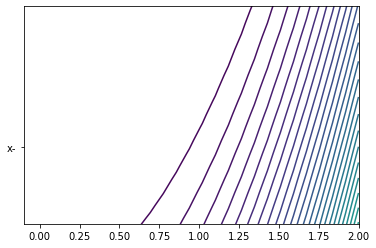

In [25]:
pt.axis("equal")
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], 'k', "x-")